# Linear Regression Basic
![alt text](https://cdn-images-1.medium.com/max/1200/1*LEmBCYAttxS6uI6rEyPLMQ.png)
The dataset is taken from [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


# A Complete Guide for Regression Problem What to Think Where to start How to do Baseline Evaluation




In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
from scipy import stats
from scipy.stats import norm
from scipy.stats import binned_statistic
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Feature Selection
Now the dataset is provided to us not necessarely a important dataset means all of its columns may not be usefull towards the prediction of our traget variable so first thing we need to do is EDA
But first load the data into our workspace.

In real-world Neighter your data comes as train,test nor such a small file so ignore the part as our prior focus is to build a regression ,model from here given dataset.


In [0]:
train_data=pd.read_csv("train.csv")#keeping all the settings default
test_data=pd.read_csv("test.csv")

First we see the columns of the dataset and understand what we have to do in the problem

In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
len(train_data.columns)

81

As we can see we have in total 81 columns from which our goal is to predict 'SalePrice' which has an index of -1/80 in the dataframe so pandas dataframe is similar to what R offers or the dataframe offered by Spark we will discuss it seperately.

Now to predict saleprice of house we have 80 index in which we know that the Id column with many other columns provides no value in prediction our goal is to identify the key player from the list and use them to predict sale for which we will take the help of EDA .

So first let's Explore the dataset and our taeget 

In [10]:
pd.set_option('display.max_columns', 81)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


If you don't want to see all the columns then omit the first line of code or you an customize according to your need

In [11]:
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
type(train_data["SalePrice"])

pandas.core.series.Series

Note that when you see a custom column of your interest pandas will show it to you as a series and not dataframe understanding concepts like this will give you benefit while you struggles with your data @stackoverflow

In [13]:
train_data["SalePrice"].isna().sum()

0

A good condition we justfound that we don't have any missing value in our dataframe means we don't have to see we hope any problems regarding cleaning our target valiable from the statistics of our data it is clear that most of our sale price is 180921.2 units where min is 34900 and max is 755000 which is 19.3% and 417.3% of the median can you guess the type of distribution from the value above.

In [16]:
print("How many variables do we have in confidence for predicting sale with median 180921.2?\nAnswer:{}".format(len(train_data.columns)-1))

How many variables do we have in confidence for predicting sale with median 180921.2?
Answer:80



Now as we have taken a dataset unknowingly that has as much as 80 features I don't know who sees such many features to rent/buy a Assets besides I thought it will be a basic Regression problem so narrow down our feature selection process by follwing assumpsion that we don't want too many null value columns in my features it's like being steve jobs in school,college,graduation,phd and so on means drop-out all the time so let's see what are the columns that we don't want in our workplace



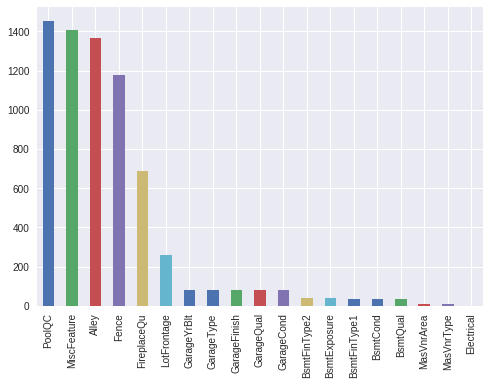

In [18]:
null_data=train_data.isnull().sum()
null_data=null_data[null_data>0]
null_data.sort_values(ascending=False,inplace=True)
null_data.plot.bar()

As we can see here the poolQC,Alley and so on features have more than 1200  missing records i don't know who is incgarge of the data collection but it's not how you collect data that has more than 82% of data missing it's like my success page diary that has approximately same amount of missing entry as it has.


Now we visualize the correlation between the features.

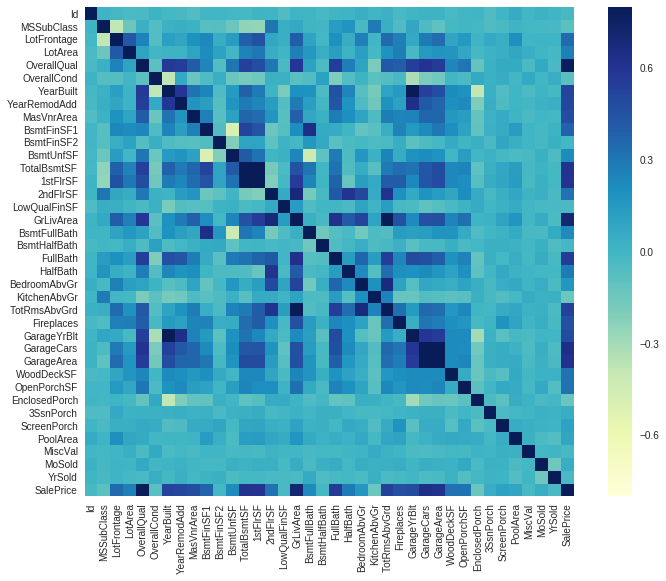

In [23]:
# visualize correlation map
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(train_data.corr(), vmax=.8,cmap="YlGnBu",square=True);

As you can see from the heat map the overAll Quality,GrLiveArea has strong corelation with the salesprice and many other features have little less but positive corelation with the saleprice.Now we will write a custom code to get insight from the heatmap as there are probably too many features that has a good corelation with the salevalue 

In [25]:
  sale_train_corr=train_data.corr()["SalePrice"]
  index_corr=sale_train_corr[sale_train_corr>=0.4].sort_values(ascending=False).index.tolist()
  print("How many feature candidates have positive correlation'(value greater than 0.4)' with SalePrice(including itself)?\n{}".format(len(index_corr)))

How many feature candidates have positive correlation'(value greater than 0.4)' with SalePrice(including itself)?
14


In [27]:
sale_train_corr0=train_data.corr()["SalePrice"]
index_corr0=sale_train_corr0[sale_train_corr0>0].sort_values(ascending=False).index.tolist()
print("How many feature candidates have positive correlation'(value greater than 0)' with SalePrice(including itself)?\n{}".format(len(index_corr0)))

How many feature candidates have positive correlation'(value greater than 0)' with SalePrice(including itself)?
28


As we can see from the data of corelationif we reduces the corelation from 0.4 to 0 the features got reduces by half

In [30]:
sale_train_corr0[index_corr0]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
Name: SalePrice, dtype: float64

In [31]:
sale_train_corr[index_corr]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

As it is a Basic NoteBook so for doing feature Engineering I wiill select the columns having atleast corelation greater than 0.4 but this is not the case when you do the same in production as in statistics there is a term corelation is not a indication of relation  

In [36]:
meta_index=["Fireplaces","MasVnrArea","GarageYrBlt","YearRemodAdd","YearBuilt","TotRmsAbvGrd","FullBath","1stFlrSF","TotalBsmtSF","GarageArea","GarageCars","GrLivArea","OverallQual","SalePrice"]
train_meta=copy.deepcopy(train_data)
small_meta=train_meta[meta_index].copy()
small_meta.head(n=5)


,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,0,196.0,2003.0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1,0.0,1976.0,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,1,162.0,2001.0,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1,0.0,1998.0,1970,1915,7,1,961,756,642,3,1717,7,140000
4,1,350.0,2000.0,2000,2000,9,2,1145,1145,836,3,2198,8,250000


# Feature Engineering With Our Small Dataset

In [37]:
small_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
Fireplaces      1460 non-null int64
MasVnrArea      1452 non-null float64
GarageYrBlt     1379 non-null float64
YearRemodAdd    1460 non-null int64
YearBuilt       1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
FullBath        1460 non-null int64
1stFlrSF        1460 non-null int64
TotalBsmtSF     1460 non-null int64
GarageArea      1460 non-null int64
GarageCars      1460 non-null int64
GrLivArea       1460 non-null int64
OverallQual     1460 non-null int64
SalePrice       1460 non-null int64
dtypes: float64(2), int64(12)
memory usage: 159.8 KB


In [0]:
small_meta=small_meta.ffill(axis=0)

In [41]:
small_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
Fireplaces      1460 non-null int64
MasVnrArea      1460 non-null float64
GarageYrBlt     1460 non-null float64
YearRemodAdd    1460 non-null int64
YearBuilt       1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
FullBath        1460 non-null int64
1stFlrSF        1460 non-null int64
TotalBsmtSF     1460 non-null int64
GarageArea      1460 non-null int64
GarageCars      1460 non-null int64
GrLivArea       1460 non-null int64
OverallQual     1460 non-null int64
SalePrice       1460 non-null int64
dtypes: float64(2), int64(12)
memory usage: 159.8 KB


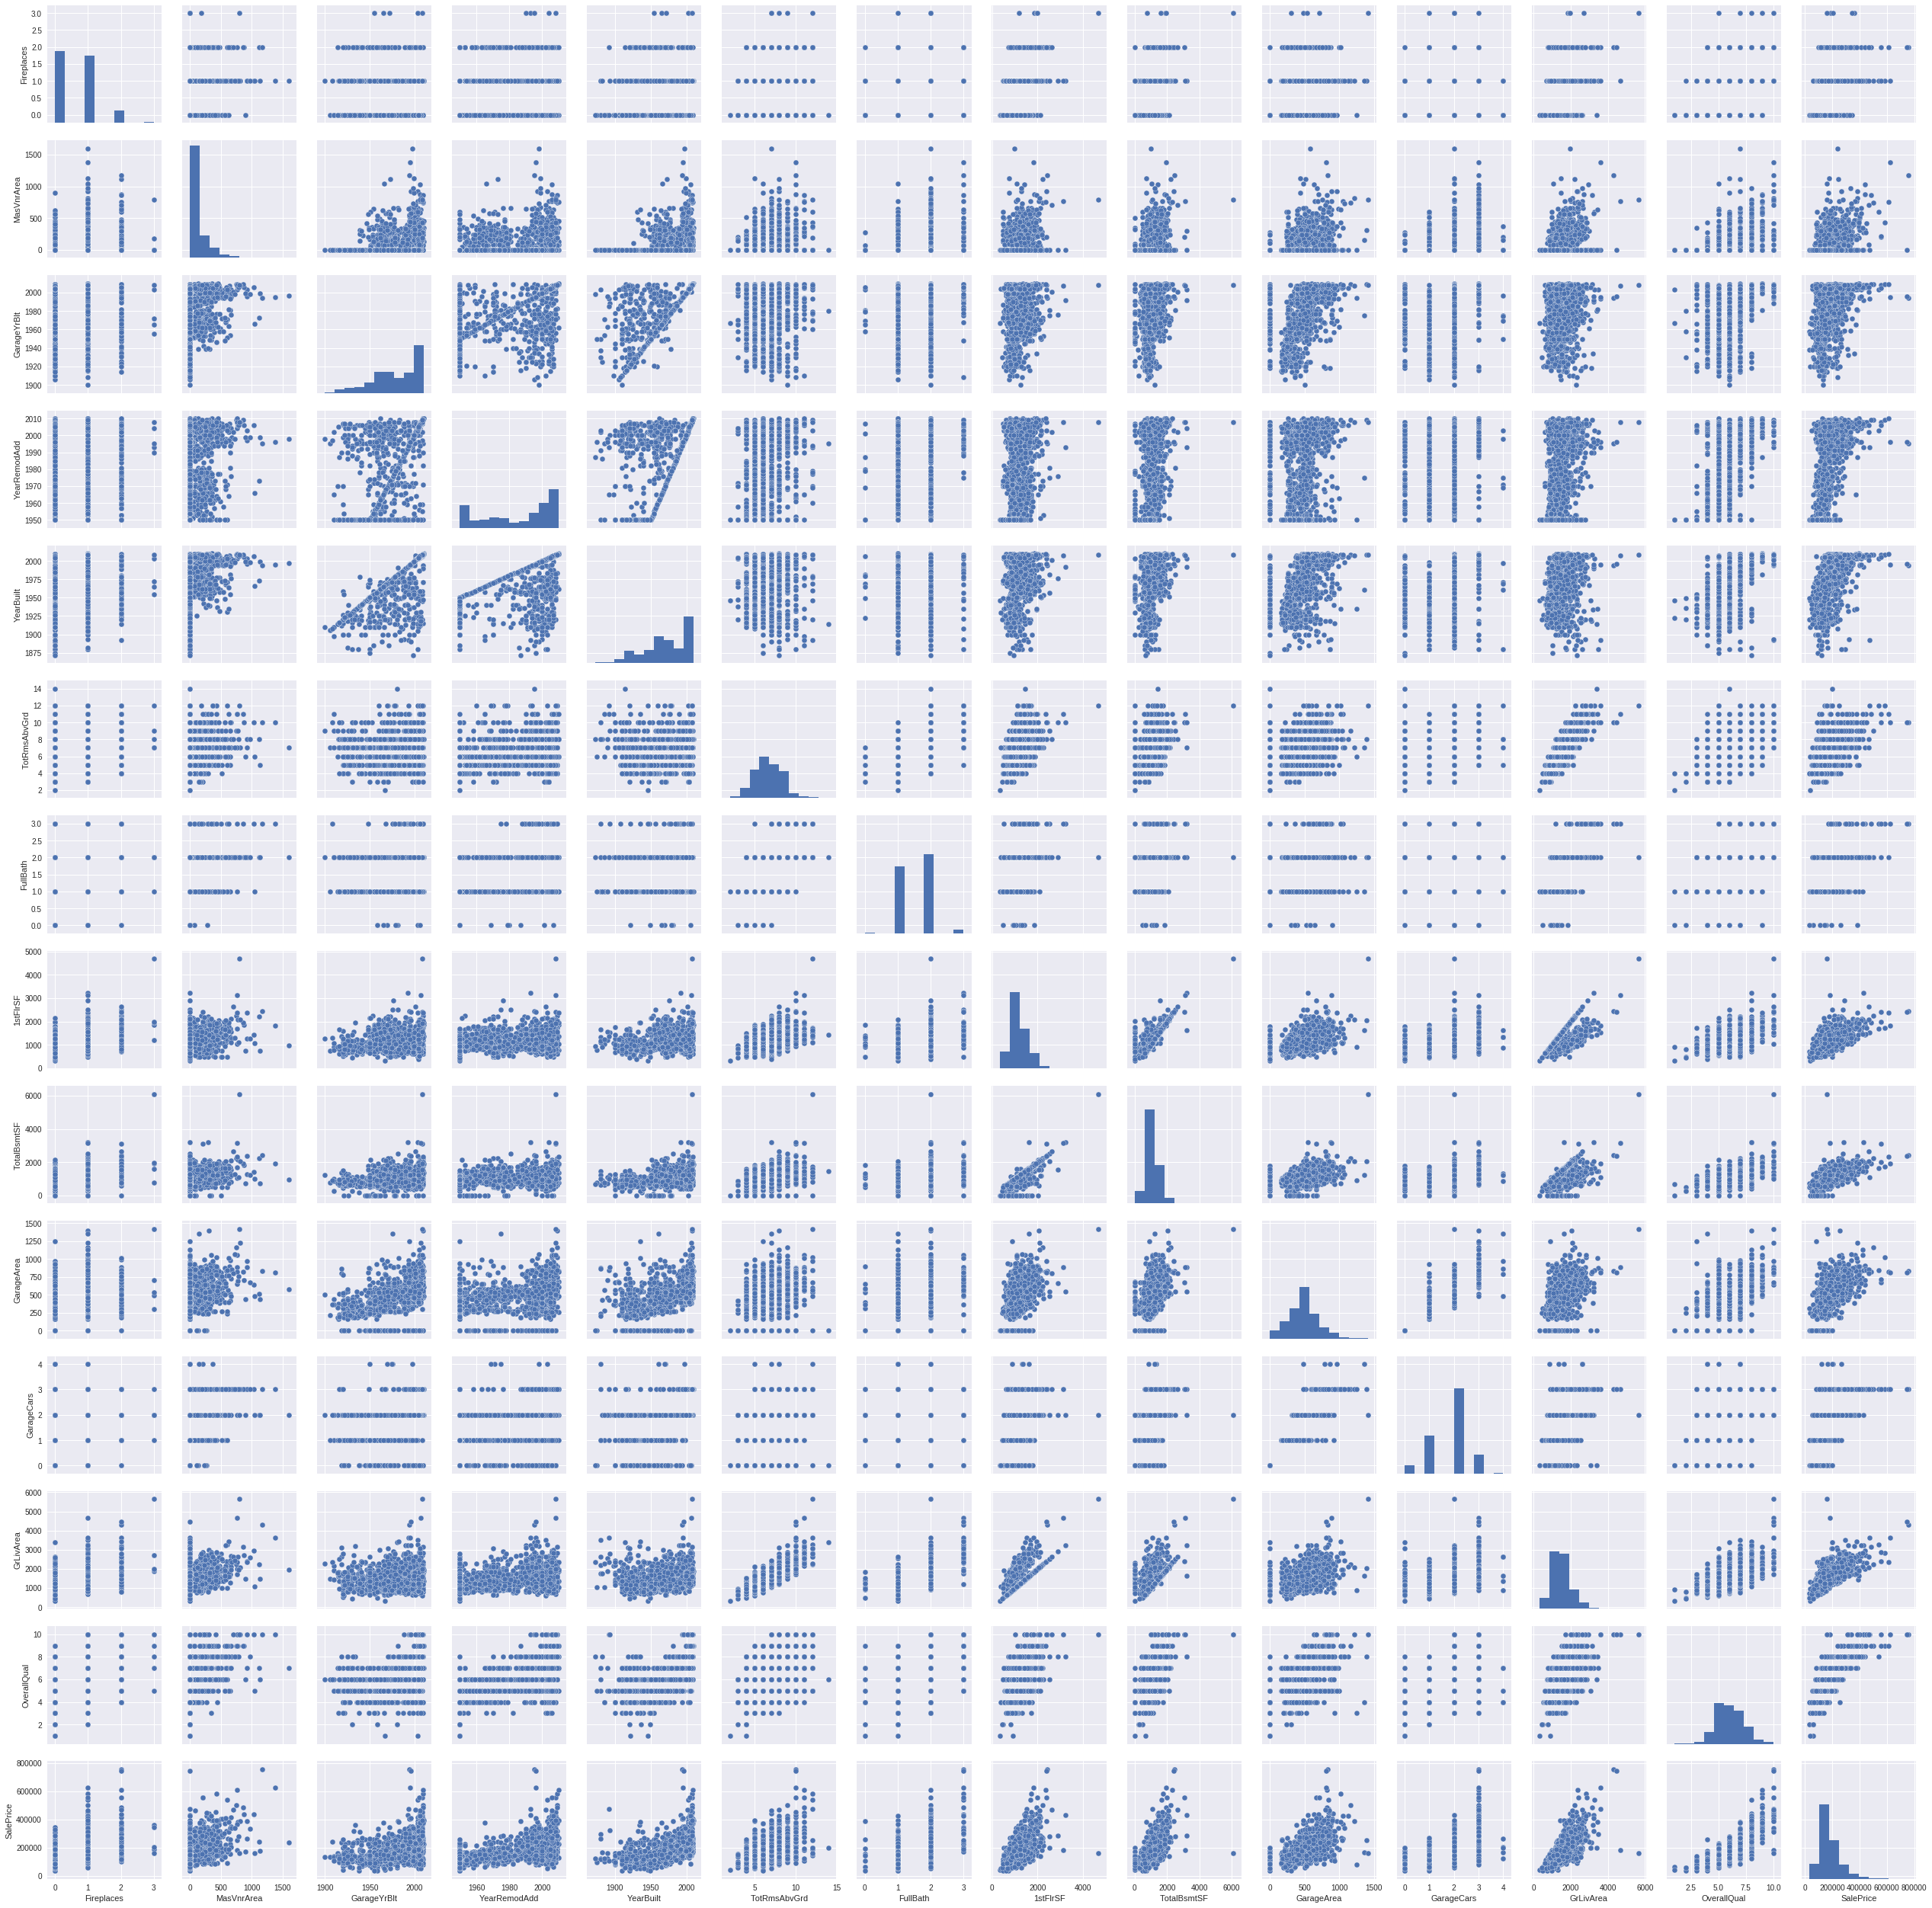

In [42]:
sns.pairplot(small_meta)

# Log TransForm Of Target

In [0]:
def drawlog(df):
  fig=plt.figure();
  plt.subplot(2,2,1)
  sns.distplot(df,fit=norm)
  plt.subplot(2,2,3)
  stats.probplot(df, plot=plt);
  plt.subplot(2,2,2)
  sns.distplot(np.log(df), fit=norm);
  plt.subplot(2,2,4)
  stats.probplot(np.log(df), plot=plt);

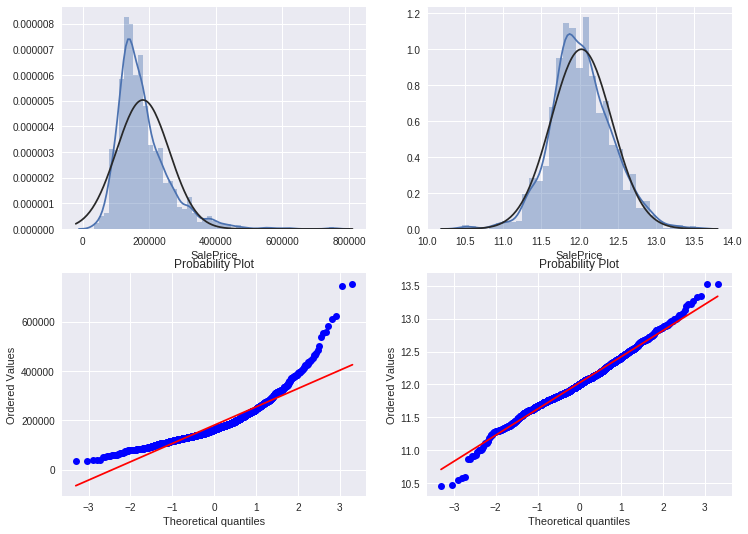

In [44]:
drawlog(small_meta["SalePrice"])

In [46]:
small_meta["GarageArea"].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
random_seed=7

In [0]:
xt_train_test, xt_valid, yt_train_test, yt_valid = train_test_split(small_meta['SalePrice'], small_meta.drop('SalePrice', axis=1), test_size=.2, random_state=random_seed)

In [0]:
xt_train, xt_test, yt_train, yt_test = train_test_split(yt_train_test, xt_train_test, test_size=.2, random_state=random_seed)

In [51]:
print("number of training set: %d\nnumber of testing set: %d\nnumber of validation set: %d\ntotal: %d" % (len(xt_train), len(xt_test), len(xt_valid), (len(xt_train)+len(xt_test)+len(xt_valid))))

number of training set: 934
number of testing set: 234
number of validation set: 292
total: 1460


In [0]:
def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

RMSE for Linear Regression Model in sklearn: 38084.16


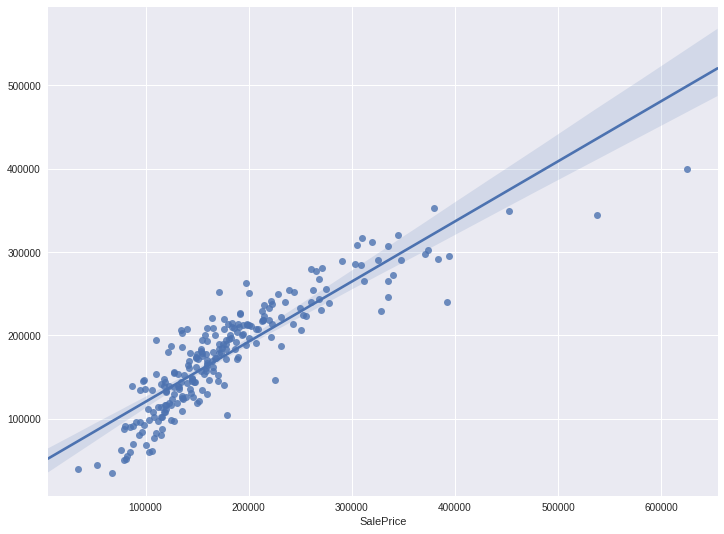

In [54]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xt_train, yt_train)
yt_lm = lm.predict(xt_test)
rmse_linear = rmse(yt_test, yt_lm)
sns.regplot(yt_test, yt_lm)
print("RMSE for Linear Regression Model in sklearn: %.2f" % rmse_linear)

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def baseline_nn_model(dims):
    model = Sequential()
    model.add(Dense(dims, input_dim=dims,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Using TensorFlow backend.


In [0]:
def use_keras_nn_model(nn_model, x, y, xx, yy, epoch):
    print("start training")
    for step in range(epoch + 1):
        cost = nn_model.train_on_batch(x.as_matrix(), y.as_matrix())
        if step % 100 == 0:
            print("train cost: %.2f" % cost)
    print("start testing")
    yy_predict = nn_model.predict(xx.as_matrix()).reshape(len(yy),)
    res = rmse(yy, yy_predict)
    sns.regplot(yy, yy_predict)
    print("RMSE for NN Model in Keras(Tensorflow): %.2f" % res)
    return res

Instructions for updating:
Colocations handled automatically by placer.
start training
Instructions for updating:
Use tf.cast instead.
train cost: 38285455360.00
train cost: 37747109888.00
train cost: 35752189952.00
train cost: 32177577984.00
train cost: 27597502464.00
train cost: 22579564544.00
train cost: 17655429120.00
train cost: 13266806784.00
start testing
RMSE for NN Model in Keras(Tensorflow): 117845.01


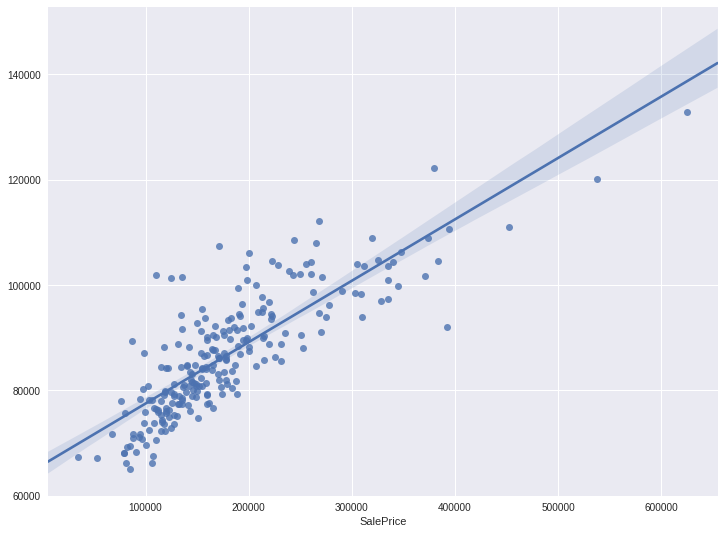

In [57]:
rmse_baselinenn = use_keras_nn_model(baseline_nn_model(xt_train.shape[1]), xt_train, yt_train, xt_test, yt_test, 700)

In [0]:
import xgboost as xgb
from xgboost import plot_importance

RMSE for xgboost: 33180.19


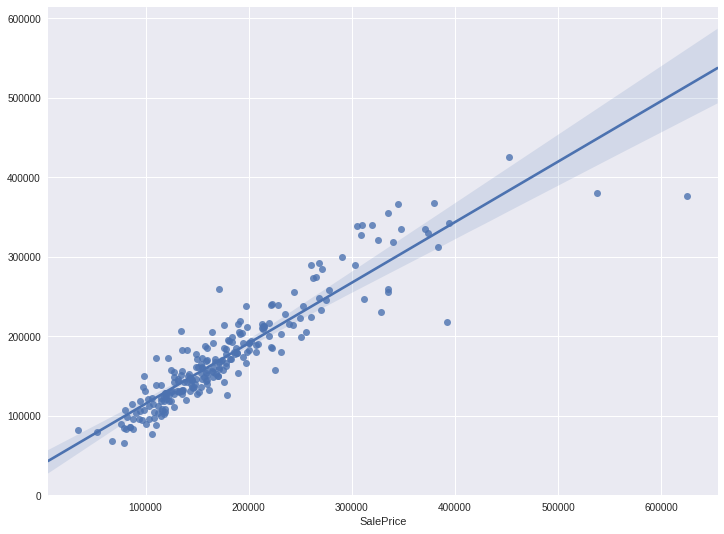

In [59]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()
dtrain = xgb.DMatrix(xt_train, yt_train)
dtest = xgb.DMatrix(xt_test)
num_rounds = 500
xgb_model = xgb.train(plst, dtrain, num_rounds)
yt_xgb = xgb_model.predict(dtest)
rmse_xgb = rmse(yt_test, yt_xgb)
sns.regplot(yt_test, yt_xgb)
print("RMSE for xgboost: %.2f" % rmse_xgb)

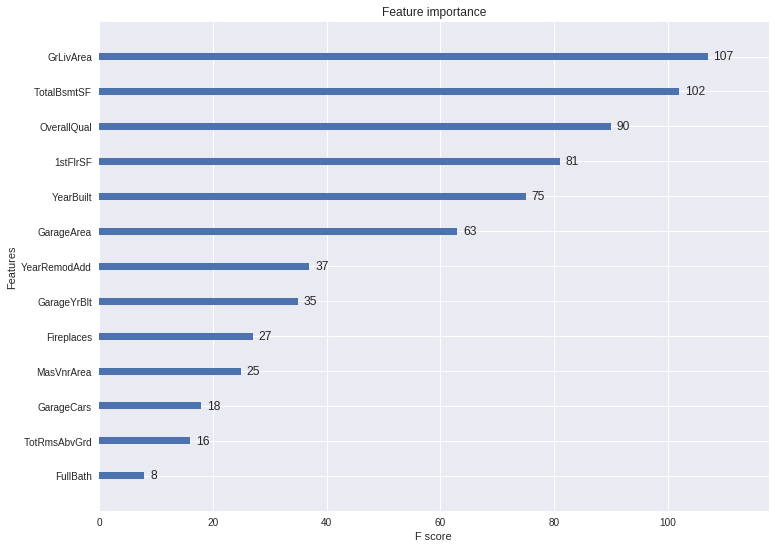

In [60]:
plot_importance(xgb_model)

In the Next NoteBook We Will dig Deeper and find even better solution for this problem Till than Good Bye from satyajit. 